# Stack Overflow Developers Survey, 2017

## Hypothesis Testing:

In this notebook, we are interested in testing whether

1) Average job satisfaction for bootcamp graduates is diferent as for non bootcamp graduates. 

2) Average job satisfaction for individuals with higher formal education is different as for individuals with maximum of bachelor's degree.

### Job Satisfaction vs Bootcamp

So in this experiment, we’re going to analyze the average job satisfaction metric for bootcamp and non-bootcamp graduates $\mu_{bg}$and $\mu_{nbg}$ respectively.

let's set up our null and alternative hypotheses:

Null ($H_{0}$): There is no difference in average Job satisfaction for bootcamp and non-bootcamp graduates.

Alternative ($H_{1}$): Bootcamp graduates have higher job satisfaction.

**Mathematically**

#### One sided alterative:

- Alternative ($H_{1}$): Bootcamp graduates have higher job satisfaction than non bootcamp graduates.

\begin{align}
H_{0}&: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}&: \mu_{bg} - \mu_{nbg} > 0
\end{align}

**or**

- Alternative ($H_{1}$): Bootcamp graduates have lower job satisfaction than non-bootcamp graduates.


\begin{align}
H_{0}&: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}&: \mu_{bg} - \mu_{nbg} < 0
\end{align}

The two cases above are what will likely happen if I have a prior knowledge of the descriptive statistics of the data and would like to test if it is true

#### Two-sided alternative

- Alternative ($H_{1}$): Average Job Satisfaction for  Bootcamp graduates is different from non-bootcamp graduates

\begin{align}
H_{0}&: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}&: \mu_{bg} - \mu_{nbg} \neq 0
\end{align}

This case would be for someone who doesnt have any knowledge of the data and just wants to test if there is any difference in the group. This is what we willbe interested in.

### Job Satisfaction vs Formal Education

If we follow the same logic as above, the our hypothesis are

- Individuals with higher formal education have higher job satisfaction than those with maximum of Bachelor's education

\begin{align}
H_{0}&: \mu_{he}-\mu_{nhe} = 0\\
H_{1}&: \mu_{he} - \mu_{nhe} > 0
\end{align}

**or**

- Alternative ($H_{1}$): Individuals with higher formal education have lower job satisfaction than those with maximum of Bachelor's education

\begin{align}
H_{0}&: \mu_{he}-\mu_{nhe} = 0\\
H_{1}&: \mu_{he} - \mu_{nhe} < 0
\end{align}


#### Two-sided alternative

- Alternative ($H_{1}$): Average Job Satisfaction for individuals with higher formal education is different from those with maximum of Bachelor's education

\begin{align}
H_{0}&: \mu_{he}-\mu_{nhe} = 0\\
H_{1}&: \mu_{he} - \mu_{nhe} \neq 0
\end{align}
**Way forward**

We will set our error threshold $\alpha = 0.01$. Now that we have our hypothesis setup, let us analyze our data.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sb
from collections import defaultdict 
%matplotlib inline

np.random.seed(42)

In [2]:
#load data
df = pd.read_csv('survey-results-public.csv')

### TimeAfterBootcamp vs JobSatisfaction

In [3]:
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True]

print("Number of non bootcamp graduates is {}".format(not_bootcamp_df.shape[0]))
print("Number of bootcamp graduates is {}".format(bootcamp_df.shape[0]))

Number of non bootcamp graduates is 48790
Number of bootcamp graduates is 2602


In [4]:
print("Average job satisfaction for non bootcamp graduates is {}".format(not_bootcamp_df['JobSatisfaction'].mean()))
print("Average job satisfaction for bootcamp graduates is {}".format(bootcamp_df['JobSatisfaction'].mean()))

Average job satisfaction for non bootcamp graduates is 6.952373463343032
Average job satisfaction for bootcamp graduates is 7.037752808988764


In [5]:
obs_diff = bootcamp_df['JobSatisfaction'].mean() - not_bootcamp_df['JobSatisfaction'].mean()
obs_diff

0.08537934564573213

In [28]:
diffs = []
#sample_df = df.sample(df.shape[0])

for _ in range(10000):
    boot_sample_bg = bootcamp_df.sample(bootcamp_df.shape[0], replace = True)
    boot_sample_nbg = not_bootcamp_df.sample(not_bootcamp_df.shape[0], replace = True)
    mean_bg = boot_sample_bg['JobSatisfaction'].mean()
    mean_nbg = boot_sample_nbg['JobSatisfaction'].mean()
    diffs.append(mean_bg - mean_nbg)

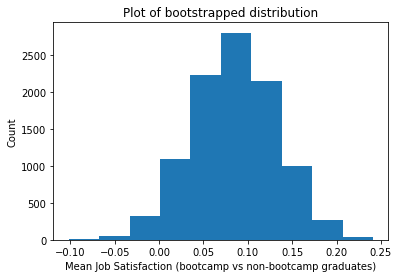

In [29]:
plt.hist(diffs);
plt.xlabel('Mean Job Satisfaction (bootcamp vs non-bootcamp graduates)')
plt.ylabel('Count')
plt.title('Plot of bootstrapped distribution');

### Simulating from the null

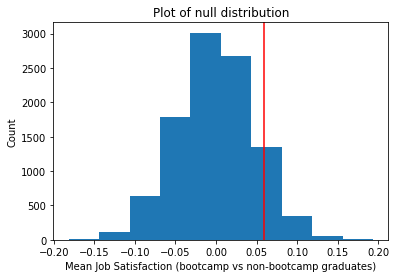

In [30]:
# Simulate distribution under the null hypothesis
diff = np.array(diffs)
null_vals = np.random.normal(0, diff.std(),diff.size)

# Plot observed statistic with the null distibution

plt.hist(null_vals);
plt.axvline(x=obs_diff,color='red');
plt.xlabel('Mean Job Satisfaction (bootcamp vs non-bootcamp graduates)')
plt.ylabel('Count')
plt.title('Plot of null distribution');


Recall our Hypothesis

$
H_{0}: \mu_{bg}-\mu_{nbg} = 0\\
H_{1}: \mu_{bg} - \mu_{nbg} \neq 0
$

In [10]:
#values that are more extreme than our sample mean in either direction away from our null hyp
null_mean = 0
(null_vals > obs_diff).mean() + (null_vals < null_mean +(null_mean - obs_diff)).mean()

0.0706

We obtain a p-value of 0.0713, which is an indication that there is a 7.13% likelyly hood that our observed statistics came from the null hypothesis. Thus we fail to reject $H_{0}$.

Let us see where our intervals fall in the null distribution.

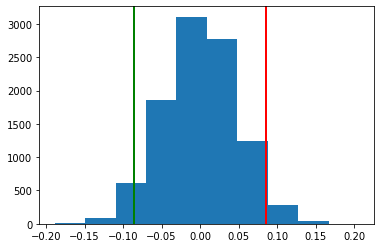

In [11]:
high = obs_diff
low = null_mean + (null_mean - obs_diff)

plt.hist(null_vals);
plt.axvline(low,color='g', linewidth=2)
plt.axvline(high,color='r', linewidth=2);

So the intervals lie far away from the bulk of our distribution. We can conclude that we do not have enough evidence that our observed statistics did not come from the Null hypothesis, hence we fail to reject $H_{0}$.

### Simulating with Confidence Interval

We already have our list difference in means from bootstrapping. We will go ahead to build our 95% confidence interval and see where it falls on our distribution.

In [31]:
low,high = np.percentile(diffs, 2.5), np.percentile(diffs,97.5)
low, high

(-0.009452552113441424, 0.1771964446560204)

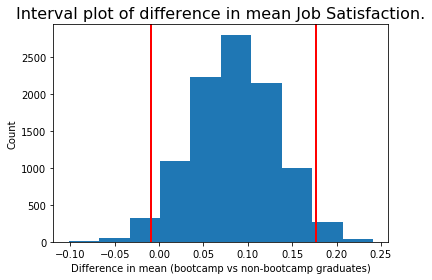

In [32]:
plt.hist(diffs);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);
plt.title('Interval plot of difference in mean Job Satisfaction.', fontsize=16)
plt.xlabel('Difference in mean (bootcamp vs non-bootcamp graduates)');
plt.ylabel('Count');

Notice a key value that is included in the 95% confidence interval for  $\mu_{bg}-\mu_{nbg}$: the value 0. In other words, a difference of 0 is included in our net, suggesting that $\mu_{bg}$ and $\mu_{nbg}$ are truly the same. 
  
In the above case, our interval included a value equal to zero, which would suggest we fail to reject the null hypothesis (the population mean is equal to zero).

### FormalEducation vs JobSatisfaction

In [14]:
HigherEdu_df = df[(df['FormalEducation'] == 'Doctoral degree') | (df['FormalEducation'] == "Master's degree")|(df['FormalEducation'] == "Professional degree") ]
HigherEdu_df['FormalEducation'].value_counts()

Master's degree        11141
Doctoral degree         1308
Professional degree      715
Name: FormalEducation, dtype: int64

In [15]:
not_HigherEdu_df = df[(df['FormalEducation'] == "Bachelor's degree") | (df['FormalEducation'] == "Some college/university study without earning a bachelor's degree")
                      |(df['FormalEducation'] == "Secondary school")|(df['FormalEducation'] == "I prefer not to answer")
                      |(df['FormalEducation'] == "Primary/elementary school")|(df['FormalEducation'] == "I never completed any formal education")]

not_HigherEdu_df['FormalEducation'].value_counts()

Bachelor's degree                                                    21609
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
I prefer not to answer                                                1109
Primary/elementary school                                             1047
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

In [16]:
print("Average job satisfaction for those with higher formal education is {}".format(HigherEdu_df['JobSatisfaction'].mean()))
print("Average job satisfaction for those with bachelors as highest education is {}".format(not_HigherEdu_df['JobSatisfaction'].mean()))

Average job satisfaction for those with higher formal education is 6.998915763135947
Average job satisfaction for those with bachelors as highest education is 6.939406749806243


In [17]:
obs_diff = HigherEdu_df['JobSatisfaction'].mean() - not_HigherEdu_df['JobSatisfaction'].mean()
obs_diff

0.05950901332970382

### Simulating from the null

#### Bootstrapping

In [18]:
diffs = []

for _ in range(10000):
    boot_sample_he = HigherEdu_df.sample(HigherEdu_df.shape[0], replace = True)
    boot_sample_nhe = not_HigherEdu_df.sample(not_HigherEdu_df.shape[0], replace = True)
    mean_he = boot_sample_he['JobSatisfaction'].mean()
    mean_nhe = boot_sample_nhe['JobSatisfaction'].mean()
    diffs.append(mean_he - mean_nhe)

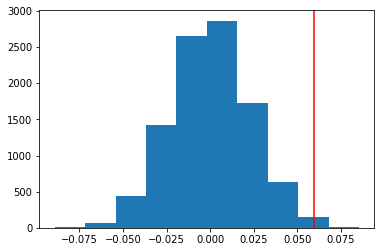

In [19]:
diff = np.array(diffs) #different possible means from our bootstrapping

# Simulate distribution under the null hypothesis with mean - 0
null_vals = np.random.normal(0, diff.std(),diff.size) 

# Plot observed statistic with the null distibution

plt.hist(null_vals);
plt.axvline(x=obs_diff,color='red');

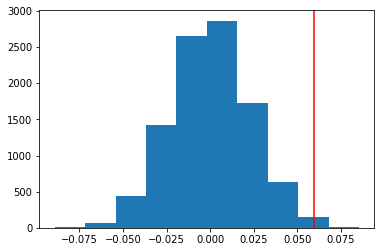

In [20]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red');

In [21]:
#values more extreme than our sample mean in either direction away from our null hyp
null_mean = 0
(null_vals > obs_diff).mean() + (null_vals < null_mean +(null_mean - obs_diff)).mean()

0.009899999999999999

**Coment**

Here we see from the figure above that our observed statistics is far away from the bulk of the distribution. Suggesting that our statistics is not coming from the null. Similarly, our p-value 0.0105 is small, less that our $\alpha = 0.05$. Thus we reject the null hypothesis. 

- There is truly a difference between average jobsatisfaction for individuals with higher formal education and those with Bachelors degree as their maximum formal education.

### Simulating with Confidence Interval

In [22]:
low,high = np.percentile(diffs, 2.5), np.percentile(diffs,97.5)
low, high

(0.013621737751913311, 0.10479106524888725)

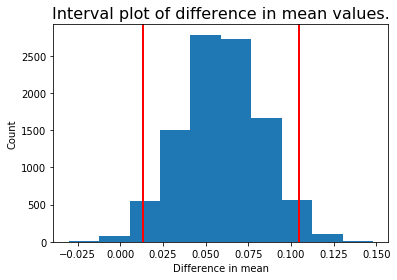

In [26]:
plt.hist(diffs);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);
plt.title('Interval plot of difference in mean values.', fontsize=16)
plt.xlabel('Difference in mean');
plt.ylabel('Count');

Notice a key value that is not included in the 95% confidence interval for  $\mu_{he}-\mu_{nhe}$: the value 0. In other words, a difference of 0 is not included in our net, suggesting that $\mu_{bg}$ and $\mu_{nbg}$ are truly different!. 
  
In the above case, our interval did not include a value equal to zero, which would suggest we reject the null hypothesis (the population mean is not equal to zero).

## Conclusion

- Having a bachelor's degree in Computer Science or Software Engineering is a foundation towards breaking into the field of software development. But we saw other individuals with higher formal education and other degrees lower than a Bachelor's degree. Similarly we saw other categories of undergraduate majors.

- Other forms of education other than formal education exist through which one could use for continuous learning purpose. These include self-taught, online courses, bootcamp etc. Self education seem to be most common for developers given its flexibiity. 

We looked at these from the perspective of individuals without a computer science or software engineering degree. 

Overall, you should be careful when deciding to go into a bootcamp asthis does not garantee a higher job satsifaction compared to not going. You could do better by taking online courses or taking a master's degree as suggested by other developers. 

On the other hand, having a higher degree PhD will gaurantee you a higher probability of obtaining the job you like. As we saw, those with higher formal education tend to have better job satisfaction compared to those with bachelors degree as their maximum. 

However with a bachelor's degree, you can expect to have a higher job satisfaction if you program as a hobby and contribute to open source projects.